<a href="https://colab.research.google.com/github/NurHaznirah/eportfolio-SECB4313/blob/main/%5B1_April_2024%5D_Heart_Disease_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB EXERCISE 1**

### **NAME: NUR HAZNIRAH BINTI HAZMAN**
### **MATRIC NO: A20EC0114**

In [1]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = "/content/gdrive/MyDrive/Semester 8/Bio Modeling&Simulation/Dataset/Heart Disease/"
model_loc = "/content/gdrive/MyDrive/Semester 8/Bio Modeling&Simulation/Dataset/"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

['heart.csv']


In [7]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [8]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

**ANSWER**

It is to ensure that the variables are treated as categories rather than numerical values, resulting in more efficient categorical data storage and processing.

In [9]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.get_dummies(data, drop_first=True) #complete your code here

<ipython-input-9-b1a2422d1941>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True) #complete your code here
<ipython-input-9-b1a2422d1941>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True) #complete your code here
<ipython-input-9-b1a2422d1941>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True) #complete your code here
<ipython-input-9-b1a2422d1941>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True) #

In [14]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values
y = y.reshape(y.shape[0],1)
x = data.drop(['target'],axis=1)

# Print shape of y
y.shape

(303, 1)

**ANSWER**

Line 3:Retrieves the values of the 'target' column

Line 4:Reshapes the y array to have one column

Line 5:Drop the 'target' column

In [15]:
# Print shape of x
x.shape

(303, 21)

In [26]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset

# Create a simple dataset
data = pd.DataFrame({'A': [10, 20, 30], 'B': [400, 500, 600], 'C': [7000, 8000, 9000]})
print('Original dataset:')
print(data)

Original dataset:
    A    B     C
0  10  400  7000
1  20  500  8000
2  30  600  9000


In [27]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**ANSWER**

The data will be scaled to a range of 0 to 1. The values of each feature will be correspondingly altered so that they fit inside this range.

In [28]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(181, 21)
(61, 21)
(61, 21)


In [29]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**ANSWER**

- The  **64 neurons** in the first layer may allow the model to learn a range of qualities from the input data.
- The **32 neurons** in the second layer may result in a decrease in complexity.
- Softmax activation in the first and second layers is less common but might be used experimentally.
- With **a single neuron** in the output layer and sigmoid activation, the model can predict probabilities for binary classification problems.

In [30]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

**ANSWER**

1. **Loss function (MSE)**:
   - Evaluates the accuracy of the model's predictions compared to actual values.

2. **Adam optimizer**:
   - Updates model parameters to minimize loss.

3. **Metrics (Accuracy)**:
   - Determines the percentage of accurately predicted samples.

The model uses the Adam optimizer to minimize MSE while measuring accuracy during training.

In [31]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
12/12 [==============================] - 2s 40ms/step - loss: 0.2499 - acc: 0.5525 - val_loss: 0.2492 - val_acc: 0.5246
Epoch 2/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.2476 - acc: 0.5580 - val_loss: 0.2485 - val_acc: 0.5246
Epoch 3/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.2449 - acc: 0.5580 - val_loss: 0.2462 - val_acc: 0.5246
Epoch 4/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.2412 - acc: 0.5580 - val_loss: 0.2401 - val_acc: 0.5246
Epoch 5/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.2345 - acc: 0.5580 - val_loss: 0.2308 - val_acc: 0.5246
Epoch 6/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.2238 - acc: 0.6133 - val_loss: 0.2145 - val_acc: 0.8033
Epoch 7/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.2080 - acc: 0.8232 - val_loss: 0.1981 - val_acc: 0.8197
Epoch 8/1000
12/12 [==============================] - 0s 11ms/step - l

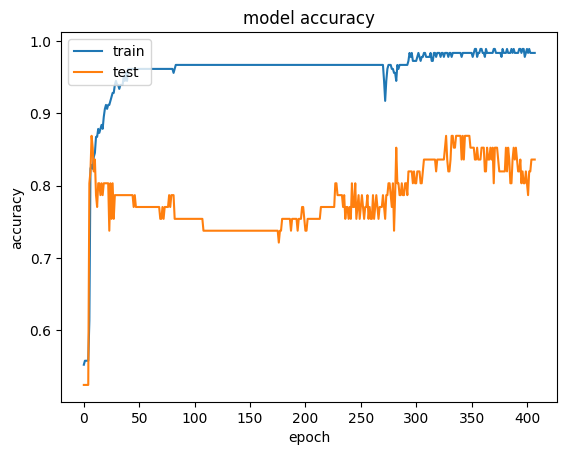

In [32]:
### 12. What does the plot generated by this code represent?

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

**ANSWER**

This code visualises the model's accuracy over epochs during training and validation.

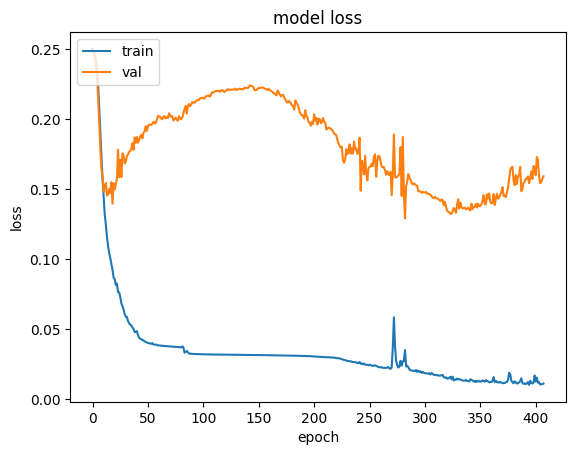

In [33]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [34]:
### 14. What is the purpose of evaluating the model on the test dataset?

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

2/2 [==============================] - 0s 11ms/step - loss: 0.2187 - acc: 0.7377

acc: 73.77%
loss: 0.22


**ANSWER**

- Evaluate the model on the test dataset to determine how it performs on previously unseen data.
- Provide information on measures like accuracy and loss.
- This evaluation aids in evaluating multiple models to determine the best one.
- Make decisions on model refinement and hyperparametertuning.


In [35]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

2/2 [==============================] - 0s 6ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [1]  Predicted: [0]  Result: Fail
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [0]  Result: Fail
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [0]  Result: Fail
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [0]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result

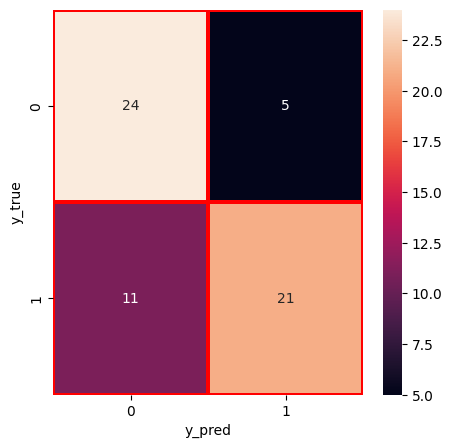


              precision    recall  f1-score   support

           0       0.69      0.83      0.75        29
           1       0.81      0.66      0.72        32

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



In [36]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

**ANSWER**

**Confusion matrix?**

A Confusion Matrix is a table that is often used to evaluate the performance of a classification model.

**Why we need it?**

A confusion matrix is essential for evaluating a classification model. It summarises the model's recall, accuracy, precision, and ability to distinguish across classes. This is very useful for the imbalanced datasets.

**Explain TP, FP, FN, TN**

- True positives (TP): occur when the model accurately predicts a positive data point.
- True negatives (TN): occur when the model accurately predicts a negative data point.
- False positives (FP): occur when the model predicts a positive data point incorrectly.
- False negatives (FN): occur when the model mispredicts a negative data point.

**Explain the classification report produce**

The classification report provides information about the model's performance in each class, such as its accuracy (**precision**), the number of positive cases it captures (**recall**), and a combined measure of accuracy and completeness (**F1-score**).